# Выполнил Андросов Дмитрий, М05-012б
## Label placement

Ссылка на github репозиторий: \
https://github.com/AndrosovDima/dataviz/tree/main/hw_3

Сколнируем репозиторий, чтобы иметь возможность читать файл с деревом оттуда

In [ ]:
! git clone https://github.com/AndrosovDima/dataviz

Cloning into 'dataviz'...
remote: Enumerating objects: 166, done.
remote: Counting objects: 100% (166/166), done.
remote: Compressing objects: 100% (155/155), done.
remote: Total 166 (delta 49), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (166/166), 467.16 KiB | 5.19 MiB/s, done.
Resolving deltas: 100% (49/49), done.


In [ ]:
from dataviz.hw_3.boxes_parse import Box

In [ ]:
with open('dataviz/hw_3/hard5.txt', 'r') as f:
  raw_data = f.read()

In [ ]:
boxes = [Box(line, f'x_{i}') for i, line in enumerate(raw_data.strip().split('\n'))]

In [ ]:
boxes

[Box(name=x_0, pos=(97, 148), size=(59, 25), offsets={0: (0, 0), 1: (59, 0), 2: (0, 25), 3: (59, 25)}),
 Box(name=x_1, pos=(49, 75), size=(36, 46), offsets={0: (0, 0), 1: (36, 0), 2: (0, 46), 3: (36, 46)}),
 Box(name=x_2, pos=(61, 15), size=(24, 20), offsets={0: (0, 0), 1: (24, 0), 2: (0, 10), 3: (24, 10), 4: (0, 20), 5: (24, 20)}),
 Box(name=x_3, pos=(141, 166), size=(10, 31), offsets={0: (0, 0), 1: (5, 0), 2: (10, 0), 3: (0, 31), 4: (5, 31), 5: (10, 31)}),
 Box(name=x_4, pos=(137, 34), size=(42, 42), offsets={0: (0, 0), 1: (42, 0), 2: (0, 21), 3: (42, 21), 4: (0, 42), 5: (42, 42)}),
 Box(name=x_5, pos=(121, 92), size=(36, 21), offsets={0: (0, 0), 1: (36, 0), 2: (0, 21), 3: (36, 21)}),
 Box(name=x_6, pos=(172, 117), size=(21, 19), offsets={0: (0, 0), 1: (21, 0), 2: (0, 19), 3: (21, 19)}),
 Box(name=x_7, pos=(137, 122), size=(54, 30), offsets={0: (0, 0), 1: (54, 0), 2: (0, 15), 3: (54, 15), 4: (0, 30), 5: (54, 30)}),
 Box(name=x_8, pos=(99, 161), size=(19, 22), offsets={0: (0, 0), 1: (

Функция, которая для двух прямоугольников говорит, пересекаются ли они

In [ ]:
def is_crossing(offset_1, pos_1, size_1, offset_2, pos_2, size_2):
  
  # координаты вершин прямоугольников
  coord_1_left_up = (pos_1[0] - offset_1[0], pos_1[1] - offset_1[1])
  coord_1_left_down = (coord_1_left_up[0], coord_1_left_up[1] + size_1[1])
  coord_1_right_up = (coord_1_left_up[0] + size_1[0], coord_1_left_up[1])
  coord_1_right_down = (coord_1_right_up[0], coord_1_left_down[1])

  coord_2_left_up = (pos_2[0] - offset_2[0], pos_2[1] - offset_2[1])
  coord_2_left_down = (coord_2_left_up[0], coord_2_left_up[1] + size_2[1])
  coord_2_right_up = (coord_2_left_up[0] + size_2[0], coord_2_left_up[1])
  coord_2_right_down = (coord_2_right_up[0], coord_2_left_down[1])

  for x, y in [coord_2_left_up, coord_2_left_down, coord_2_right_up, coord_2_right_down]:
    if x >= coord_1_left_down[0] and x <= coord_1_right_down[0] and \
      y >= coord_1_left_up[1] and y <= coord_1_left_down[1]:
      return True

  for x, y in [coord_1_left_up, coord_1_left_down, coord_1_right_up, coord_1_right_down]:
    if x >= coord_2_left_down[0] and x <= coord_2_right_down[0] and \
      y >= coord_2_left_up[1] and y <= coord_2_left_down[1]:
      return True
  
  if coord_1_left_up[0] >= coord_2_left_up[0] and coord_1_right_up[0] <= coord_2_right_up[0] and \
    coord_1_left_up[1] <= coord_2_left_up[1] and coord_1_left_down[1] >= coord_2_left_down[1] or \
    coord_2_left_up[0] >= coord_1_left_up[0] and coord_2_right_up[0] <= coord_1_right_up[0] and \
    coord_2_left_up[1] <= coord_1_left_up[1] and coord_2_left_down[1] >= coord_1_left_down[1]:
    return True
  
  return False

Функция, которая для двух точек говорит, какие их прямоугольники пересекаются

In [ ]:
def crossings_between_boxes(x1, x2):
  crossings = []
  for k_1 in x1.offsets.keys():
    pos_1 = x1.pos.xy
    size_1 = x1.size.xy
    for k_2 in x2.offsets.keys():
      pos_2 = x2.pos.xy
      size_2 = x2.size.xy
      if is_crossing(x1.offsets[k_1].xy, pos_1, size_1, x2.offsets[k_2].xy, pos_2, size_2):
        crossings.append((x1.name, k_1, x2.name, k_2))
  return crossings

Функция, которая для всех пар точек говорит, какие прямоугольники пересекаются

In [ ]:
def get_constraints(boxes):
  constraints = []
  for index_1 in range(len(boxes)):
    for index_2 in range(index_1 + 1, len(boxes)):
      constraints += crossings_between_boxes(boxes[index_1], boxes[index_2])
  return constraints

In [ ]:
!pip install python-constraint

In [ ]:
from constraint import Problem

In [ ]:
def lambda_constraint(constraint):
  return lambda a, b: a != constraint[1] or b != constraint[3]

In [ ]:
def solving_problem_constraint(boxes):
  problem = Problem()
  for box in boxes:
    num_vals = len(box.offsets)
    problem.addVariable(box.name, list(range(num_vals)))
  constraints = get_constraints(boxes)
  for constraint in constraints:
    problem.addConstraint(lambda_constraint(constraint), (constraint[0], constraint[2]))
  print(problem.getSolution())
  return problem.getSolution()

In [ ]:
solution = solving_problem_constraint(boxes)

{'x_7': 3, 'x_9': 7, 'x_0': 1, 'x_4': 4, 'x_10': 2, 'x_12': 3, 'x_13': 7, 'x_3': 2, 'x_8': 2, 'x_21': 3, 'x_1': 1, 'x_16': 3, 'x_14': 4, 'x_2': 1, 'x_6': 3, 'x_20': 2, 'x_5': 2, 'x_17': 3, 'x_15': 3, 'x_18': 3, 'x_19': 1, 'x_11': 5}


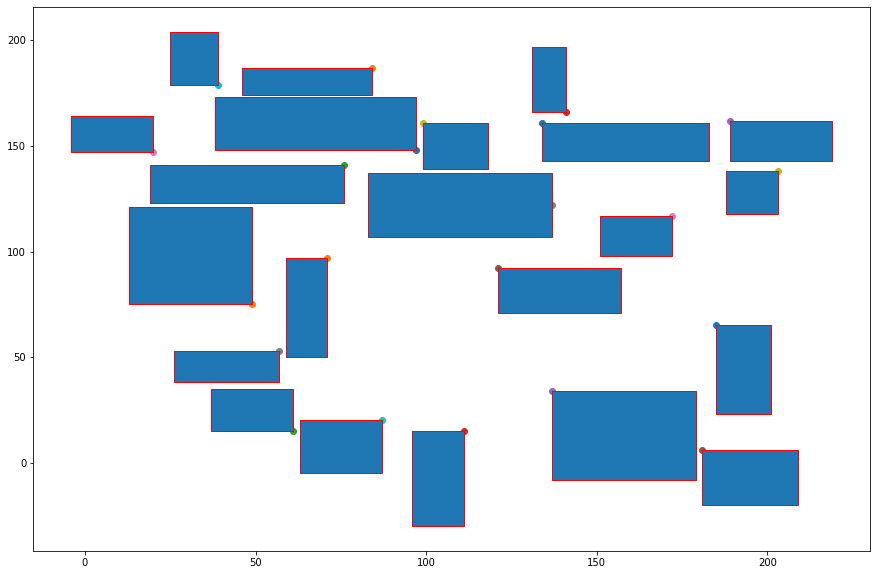

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

fig, ax = plt.subplots()

fig.set_figheight(10)
fig.set_figwidth(15)

for box in boxes:
  ax.add_patch(Rectangle((box.pos.xy[0] - box.offsets[solution[box.name]].xy[0], box.pos.xy[1] - box.offsets[solution[box.name]].xy[1]), \
                         box.size.xy[0], box.size.xy[1], edgecolor='r'))
  ax.scatter(box.pos.xy[0], box.pos.xy[1])


plt.savefig('hard5.png')
plt.show()